In [62]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style="whitegrid", palette = ("bright"))
import warnings;warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
import os

In [2]:
df=pd.read_csv("drug.csv")

In [6]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [8]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [10]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [11]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Matplotlib is building the font cache; this may take a moment.


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Na_to_K'}>]], dtype=object)

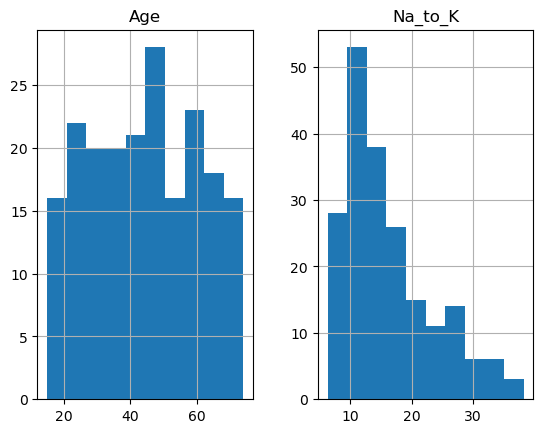

In [12]:
df.hist()

In [17]:
plt.show()

In [22]:
colors=['red','blue','yellow','green','purple']
drugs=['drugA','drugB','drugC','drugX','drugY']

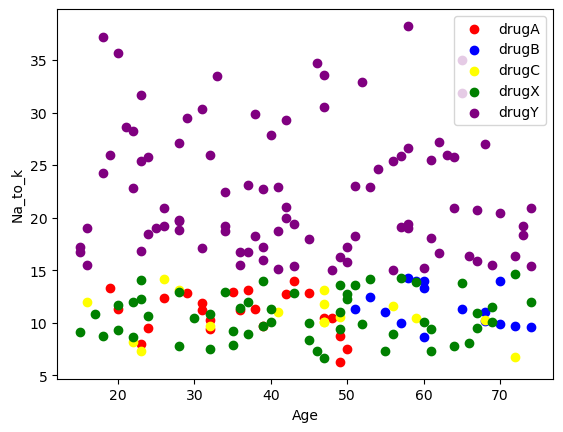

In [23]:
for i in range(5):
    x = df[df['Drug'] == drugs[i]]
    plt.scatter(x['Age'], x['Na_to_K'], c = colors[i], label=drugs[i])
plt.xlabel("Age")
plt.ylabel("Na_to_k")
plt.legend()

In [32]:
print(f"Unique values in sex column: {df['Sex'].unique()}")
print(f"Unique values in bp column: {df['BP'].unique()}")
print(f"Unique values in cholesterol column: {df['Cholesterol'].unique()}")

Unique values in sex column: ['F' 'M']
Unique values in bp column: ['HIGH' 'LOW' 'NORMAL']
Unique values in cholesterol column: ['HIGH' 'NORMAL']


In [36]:
lb = LabelEncoder()
cols = ['Sex','BP','Cholesterol']
for col in cols:
    df[col] = lb.fit_transform(df[col].values)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


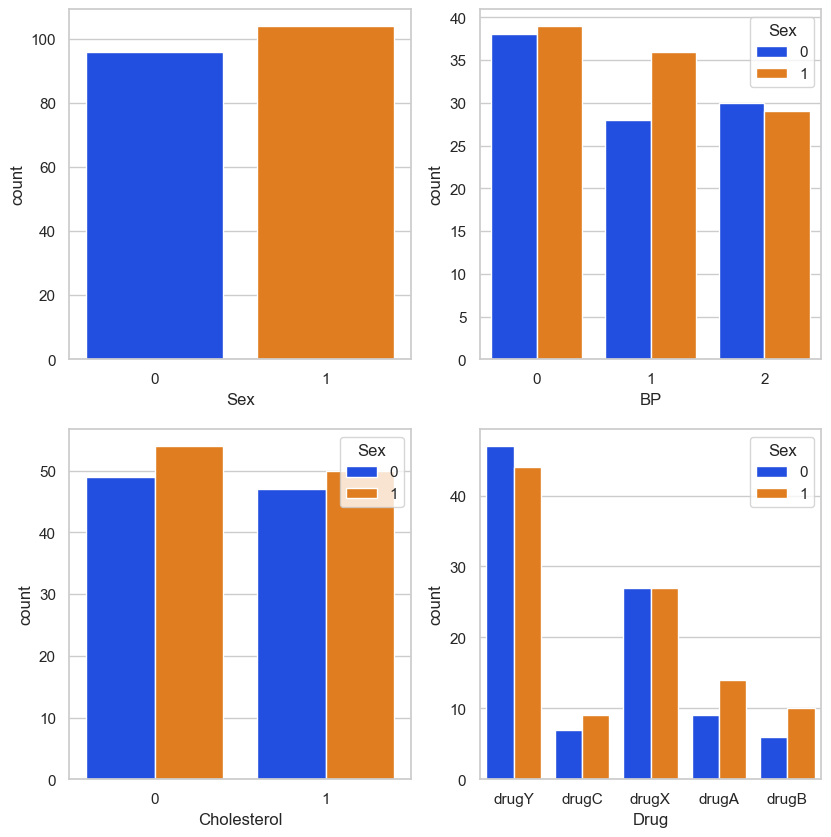

In [63]:
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
sns.countplot(data = df, x ='Sex')
plt.subplot(2,3,2)
sns.countplot(data = df, x ='BP',hue = 'Sex')
plt.subplot(2,3,4)
sns.countplot(data = df, x ='Cholesterol',hue = 'Sex')
plt.subplot(2,3,5)
sns.countplot(data = df, x = 'Drug', hue = 'Sex')
plt.show()

In [40]:
X = df.drop(columns = 'Drug')
y = df['Drug']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 5)

In [42]:
ss = StandardScaler()
ss = ss.fit(X_train)
X_train_trans = ss.transform(X_train)
X_train_trans[:5]

array([[-0.47985612, -1.06904497,  1.35340079, -0.98675438,  0.15031413],
       [-0.11785234,  0.93541435,  0.13044827, -0.98675438,  0.60913529],
       [-1.26419764,  0.93541435,  1.35340079, -0.98675438, -0.48204276],
       [ 0.66648918,  0.93541435,  1.35340079,  1.01342342, -1.18561546],
       [-1.44519953, -1.06904497,  1.35340079,  1.01342342, -0.90131523]])

In [43]:
y_train.value_counts()

drugY    64
drugX    43
drugA    20
drugB    12
drugC    11
Name: Drug, dtype: int64

In [44]:
sm = SMOTE(random_state = 2)
X_train_sm,y_train_sm = sm.fit_resample(X_train_trans, y_train)

In [45]:
y_train_sm.value_counts()

drugY    64
drugX    64
drugA    64
drugC    64
drugB    64
Name: Drug, dtype: int64

In [50]:
clf = DecisionTreeClassifier()
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "criterion": ["gini", "entropy"]}
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_sm, y_train_sm),grid_search.best_estimator_,grid_search.best_score_

(GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': [3, None], 'max_features': [1, 3, 10],
                          'min_samples_split': [2, 3, 10]}),
 DecisionTreeClassifier(max_features=10),
 0.996875)

In [51]:
model = DecisionTreeClassifier(max_features=3, min_samples_split=10).fit(X_train_sm, y_train_sm)

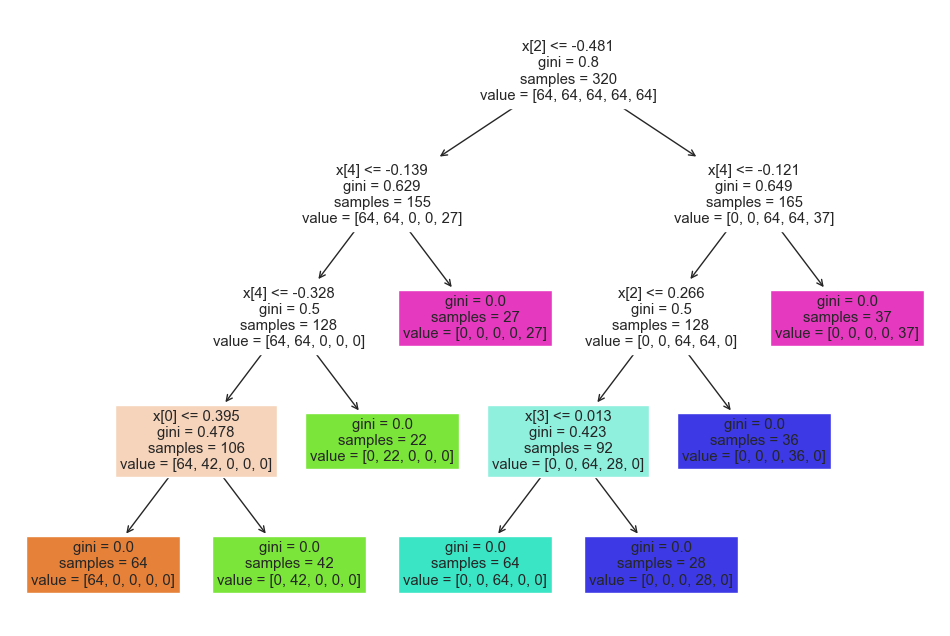

In [52]:
plt.figure(figsize = (12, 8))
plot_tree(model,filled=True)
plt.show()

In [57]:
val_score = cross_val_score(model,X_train_sm,y_train_sm,cv = 5)
print(f'minimum score of model on trained data : {val_score.min()}')
print(f'best score of model on trained data : {val_score.mean()}')
print(f'maximum score of model on trained data : {val_score.max()}')

minimum score of model on trained data : 0.921875
best score of model on trained data : 0.978125
maximum score of model on trained data : 1.0


In [59]:
ss = StandardScaler()
ss = ss.fit(X_test)
X_test_trans = ss.transform(X_test)

In [60]:
pred = model.predict(X_test_trans)

In [61]:
print(f'Model accuracy on unseen data {accuracy_score(y_test,pred)}')

Model accuracy on unseen data 0.94
